In [13]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

from sklearn.preprocessing import StandardScaler

In [15]:
df = pd.read_csv('/content/drive/MyDrive/datascience_file/Real_Combine.csv')

In [16]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


T--temperature

TM--Maximum temperature

Tm--Minimum temperature

SLP--Station Level pressure

H--Humidity

w--wind

v--visibility

vm--unknown

PM2.5--fine particulate matter(major cause of air pollution)


PM2.5<=50---good

pm2.5>=50<150--moderate

pm2.5>150<=200--unhealthy

pm2.5>200<=300--very unhealthy

pm2.5>300---harzardous

In [17]:
#check for null vaues
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [18]:
#check for unique values
df.nunique()

T         243
TM        238
Tm        223
SLP       254
H          76
VV         22
V          94
VM         27
PM 2.5    555
dtype: int64

In [19]:
#summary
df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1092.000000
mean,26.009241,32.482251,19.460201,1008.081885,62.918573,2.003111,6.751510,15.805124,109.090984
std,7.237401,6.679078,7.438653,7.529237,15.709816,0.747541,3.841137,7.308435,84.465790
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.200000,21.200000,1008.100000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


In [20]:
#check no of rows and columns
df.shape

(1093, 9)

EDA

In [21]:
df.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

T


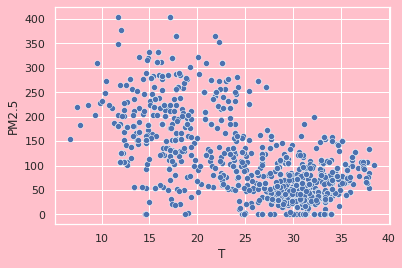

TM


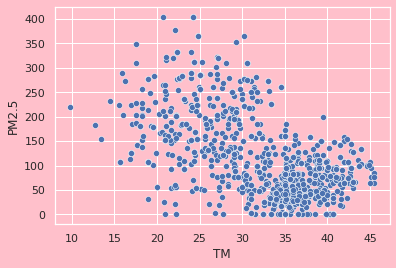

Tm


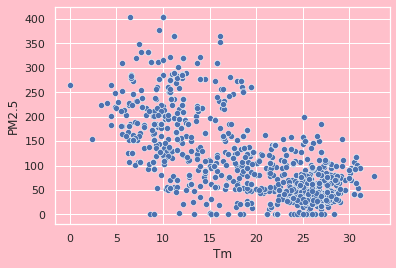

SLP


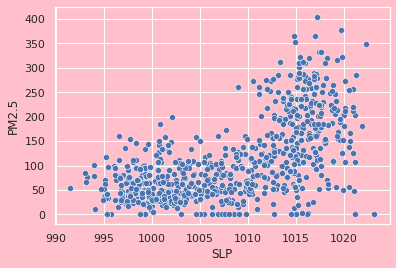

H


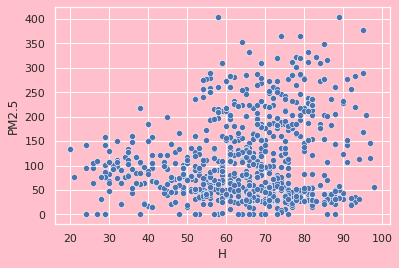

VV


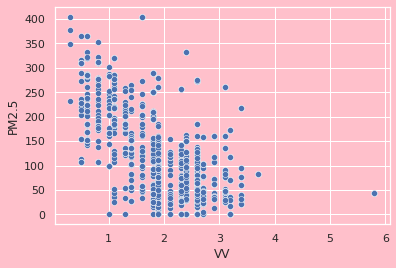

V


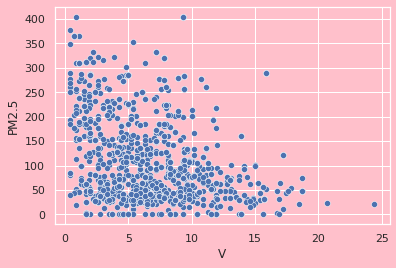

VM


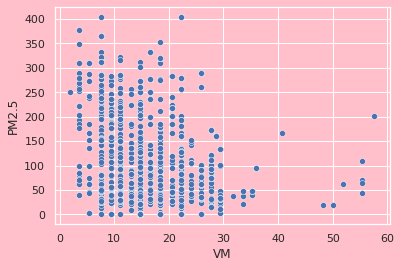

PM 2.5


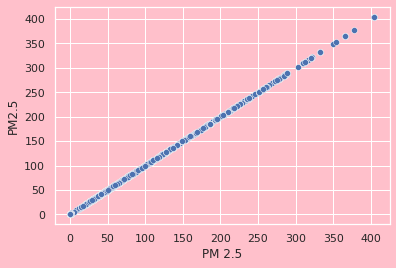

In [22]:
#relation between all the variables with the pm2.5
import seaborn as sns
for i in df.columns:
  sns.set(rc={'axes.facecolor':'pink', 'figure.facecolor':'pink'})
  sns.scatterplot(x=df[i],y=df['PM 2.5'],palette="deep")
  sns.color_palette("Set2")  
  plt.xlabel(i)
  plt.ylabel('PM2.5')
  print(i)
  plt.show()

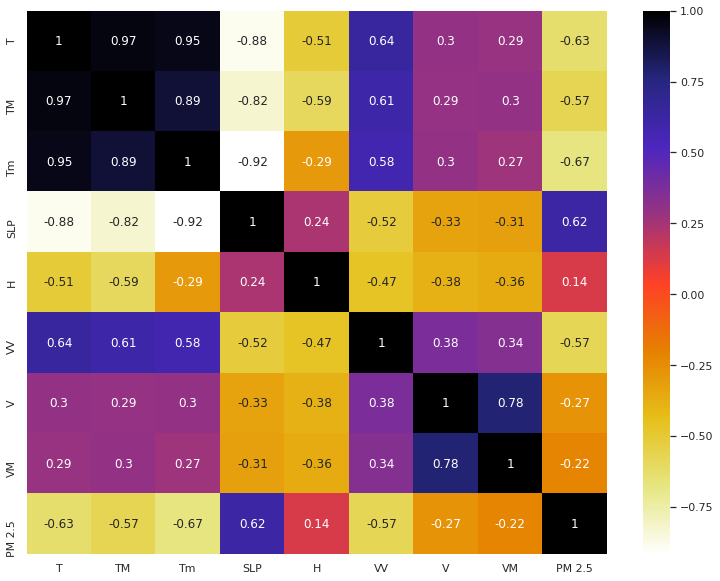

In [23]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.figure(figsize=(13,10))
c = df.corr()
sns.heatmap(c, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

There is presence of multicolinearity.With only Tm we can predict the PM 2.5 value since it as strong relationship with all the other variables,but i choose to use all the variables just for experimental reasons

In [34]:
#drop null
df=df.dropna()

In [36]:
#splitting into x and y
x = df.drop('PM 2.5',axis=1)

In [37]:
y = df['PM 2.5']

In [72]:
#split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [73]:
#features scaling
from sklearn.preprocessing import StandardScaler
stc = StandardScaler()
x_train = stc.fit_transform(x_train)
x_test = stc.transform(x_test)

**ANN**

In [76]:
model = Sequential()
model.add(Dense(units=352,kernel_initializer='he_uniform', input_dim=8, activation='relu'))

model.add(Dense(units=448,kernel_initializer='he_uniform', activation='relu'))

model.add(Dense(units=448,kernel_initializer='he_uniform',activation='relu'))

model.add(Dense(units=448,kernel_initializer='he_uniform', activation='relu'))

model.add(Dense(units=482,kernel_initializer='he_uniform', activation='relu'))

model.add(Dense(units=1,kernel_initializer='he_uniform', activation='linear'))

In [77]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [78]:
model.fit(x_train,y_train, epochs=20, batch_size=100)

Epoch 1/20
8/8 [==============================] - 1s 5ms/step - loss: 94.0460 - mean_absolute_error: 94.0460
Epoch 2/20
8/8 [==============================] - 0s 5ms/step - loss: 57.6381 - mean_absolute_error: 57.6381
Epoch 3/20
8/8 [==============================] - 0s 5ms/step - loss: 47.2978 - mean_absolute_error: 47.2978
Epoch 4/20
8/8 [==============================] - 0s 5ms/step - loss: 40.6105 - mean_absolute_error: 40.6105
Epoch 5/20
8/8 [==============================] - 0s 5ms/step - loss: 37.1735 - mean_absolute_error: 37.1735
Epoch 6/20
8/8 [==============================] - 0s 5ms/step - loss: 37.0726 - mean_absolute_error: 37.0726
Epoch 7/20
8/8 [==============================] - 0s 5ms/step - loss: 36.4542 - mean_absolute_error: 36.4542
Epoch 8/20
8/8 [==============================] - 0s 5ms/step - loss: 35.4834 - mean_absolute_error: 35.4834
Epoch 9/20
8/8 [==============================] - 0s 4ms/step - loss: 34.7932 - mean_absolute_error: 34.7932
Epoch 10/20
8/8 [==

In [79]:
y_pred = model.predict(x_test)

In [91]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('The mean absolute error:',round(mean_absolute_error(y_pred,y_test)),'PM2.5')
print('The root mean squared error:',round(mean_squared_error(y_pred,y_test)**0.5),'PM2.5')

The mean absolute error: 31 PM2.5
The root mean squared error: 50 PM2.5
